## Predicting Exam Scores Using Linear Regression
 

In [ ]:
# 📦 Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [ ]:
# 📥 Load Data
df = pd.read_csv("test_scores.csv")




In [ ]:
df.head

<bound method NDFrame.head of      School School Setting School Type Classroom Teaching Method  n_student  \
0     ANKYI          Urban  Non-public       6OL        Standard         20   
1     ANKYI          Urban  Non-public       6OL        Standard         20   
2     ANKYI          Urban  Non-public       6OL        Standard         20   
3     ANKYI          Urban  Non-public       6OL        Standard         20   
4     ANKYI          Urban  Non-public       6OL        Standard         20   
...     ...            ...         ...       ...             ...        ...   
2128  ZOWMK          Urban      Public       ZBH        Standard         30   
2129  ZOWMK          Urban      Public       ZBH        Standard         30   
2130  ZOWMK          Urban      Public       ZBH        Standard         30   
2131  ZOWMK          Urban      Public       ZBH        Standard         30   
2132  ZOWMK          Urban      Public       ZBH        Standard         30   

     Student ID  Gend

In [ ]:
df.size

23463

In [ ]:
df.info

<bound method DataFrame.info of      School School Setting School Type Classroom Teaching Method  n_student  \
0     ANKYI          Urban  Non-public       6OL        Standard         20   
1     ANKYI          Urban  Non-public       6OL        Standard         20   
2     ANKYI          Urban  Non-public       6OL        Standard         20   
3     ANKYI          Urban  Non-public       6OL        Standard         20   
4     ANKYI          Urban  Non-public       6OL        Standard         20   
...     ...            ...         ...       ...             ...        ...   
2128  ZOWMK          Urban      Public       ZBH        Standard         30   
2129  ZOWMK          Urban      Public       ZBH        Standard         30   
2130  ZOWMK          Urban      Public       ZBH        Standard         30   
2131  ZOWMK          Urban      Public       ZBH        Standard         30   
2132  ZOWMK          Urban      Public       ZBH        Standard         30   

     Student ID  Ge

In [ ]:
df.columns

Index(['School', 'School Setting', 'School Type', 'Classroom',
       'Teaching Method', 'n_student', 'Student ID', 'Gender', 'Lunch',
       'Pretest', 'Posttest'],
      dtype='object')

In [ ]:
df.describe

<bound method NDFrame.describe of      School School Setting School Type Classroom Teaching Method  n_student  \
0     ANKYI          Urban  Non-public       6OL        Standard         20   
1     ANKYI          Urban  Non-public       6OL        Standard         20   
2     ANKYI          Urban  Non-public       6OL        Standard         20   
3     ANKYI          Urban  Non-public       6OL        Standard         20   
4     ANKYI          Urban  Non-public       6OL        Standard         20   
...     ...            ...         ...       ...             ...        ...   
2128  ZOWMK          Urban      Public       ZBH        Standard         30   
2129  ZOWMK          Urban      Public       ZBH        Standard         30   
2130  ZOWMK          Urban      Public       ZBH        Standard         30   
2131  ZOWMK          Urban      Public       ZBH        Standard         30   
2132  ZOWMK          Urban      Public       ZBH        Standard         30   

     Student ID  

In [ ]:
# 🔄 Encode Categorical Variables
cat_cols = ['School', 'School Setting', 'School Type', 'Classroom',    # converting text values into numeric values
            'Teaching Method', 'Gender', 'Lunch']
encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le



In [ ]:
# 🔢 Scale Numerical Features
scaler = StandardScaler()
df[['n_student', 'Pretest']] = scaler.fit_transform(df[['n_student', 'Pretest']])#adjust the valus average=0,standard deviation=1
df.drop(columns=["Student ID"], inplace=True)   ## drop the columns



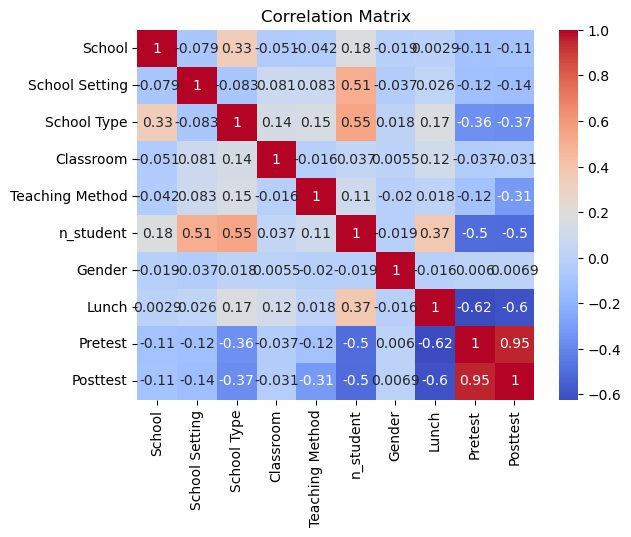

In [ ]:
# 🔍 Quick EDA
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()



In [ ]:
# 🚀 Model Training
X = df.drop("Posttest", axis=1)
y = df["Posttest"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)



In [ ]:
# 📊 Evaluation
print("MAE:", mean_absolute_error(y_test, pred))
print("MSE:", mean_squared_error(y_test, pred))
print("R²:", r2_score(y_test, pred))



MAE: 2.5645512532422696
MSE: 10.65108302591082
R²: 0.9470470194055011


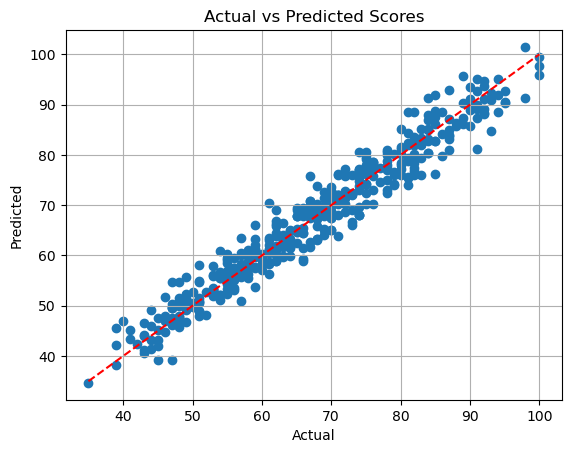

In [ ]:
# 📈 Visualization
plt.scatter(y_test, pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Scores")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.show()



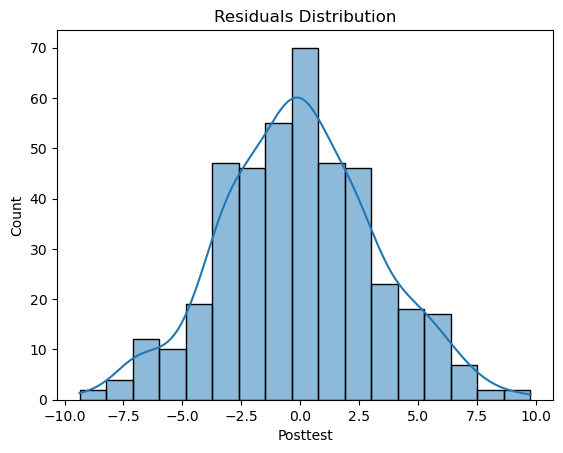

In [ ]:
# 📉 Residuals
residuals = y_test - pred
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()



In [ ]:
# 🔮 Predict New Student Score
print("\n--- Enter New Student Data ---")
new_input = {}

# Get input for all features
for col in X.columns:
    if col in encoders:  # for categorical values
        print(f"{col} options: {list(encoders[col].classes_)}")
        val = input(f"Enter {col}: ")
        new_input[col] = encoders[col].transform([val])[0]
    else:  # for numerical values (n_student, Pretest)
        val = float(input(f"Enter {col}: "))
        if col in ['n_student', 'Pretest']:
            new_input[col] = scaler.transform([[val, val]])[0][0] if col == 'n_student' else scaler.transform([[val, val]])[0][1]

# Convert to DataFrame and predict
new_df = pd.DataFrame([new_input])
predicted_score = model.predict(new_df)[0]
print(f"\n Predicted Posttest Score: {predicted_score:.2f}")



--- Enter New Student Data ---
School options: ['ANKYI', 'CCAAW', 'CIMBB', 'CUQAM', 'DNQDD', 'FBUMG', 'GJJHK', 'GOKXL', 'GOOBU', 'IDGFP', 'KFZMY', 'KZKKE', 'LAYPA', 'OJOBU', 'QOQTS', 'UAGPU', 'UKPGS', 'UUUQX', 'VHDHF', 'VKWQH', 'VVTVA', 'ZMNYA', 'ZOWMK']


In [ ]:
ANKYI
